In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from tqdm import tqdm

In [55]:
sns.set_theme(context='notebook', style='darkgrid', palette="rocket_r")

In [2]:
aisles=pd.read_csv("aisles.csv")
depart=pd.read_csv("departments.csv")
prior=pd.read_csv("order_products__prior.csv")
train=pd.read_csv("order_products__train.csv")
orders=pd.read_csv("orders.csv")
products=pd.read_csv("products.csv")

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
depart.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Finding % of null values in the dataset

In [9]:
dfs=[aisles,depart,prior,train,orders,products]
tab=["aisles","depart","prior",'train',"orders","products"]
i=0
for df in dfs:
    print(tab[i].capitalize())
    print(pd.DataFrame({"columns":df.columns,"Null values":(df.isnull().sum()*100/len(df)).values}))
    print("\n\n")
    i+=1

Aisles
    columns  Null values
0  aisle_id          0.0
1     aisle          0.0



Depart
         columns  Null values
0  department_id          0.0
1     department          0.0



Prior
             columns  Null values
0           order_id          0.0
1         product_id          0.0
2  add_to_cart_order          0.0
3          reordered          0.0



Train
             columns  Null values
0           order_id          0.0
1         product_id          0.0
2  add_to_cart_order          0.0
3          reordered          0.0



Orders
                  columns  Null values
0                order_id     0.000000
1                 user_id     0.000000
2                eval_set     0.000000
3            order_number     0.000000
4               order_dow     0.000000
5       order_hour_of_day     0.000000
6  days_since_prior_order     6.027594



Products
         columns  Null values
0     product_id          0.0
1   product_name          0.0
2       aisle_id          0.0
3  dep

In [10]:
len(orders['user_id'].unique())*100/len(orders['user_id'])

6.027594185817766

We can see 6% of data in days_since_prior_order column of orders table have null values. Also we can see that there are 6% of unique users in the total data. 
In the order table for every user the first order have a null value in days_since_prior_order. And it is also reasonable. So we will impute 0 in the null values

In [11]:
gc.collect()

0

In [12]:
prior_train_orders = pd.concat([prior, train]).sort_values(by=['order_id'])
del prior,train
gc.collect()
#merge with rest
prior_train_orders = pd.merge(left = prior_train_orders, right = products,
                             left_on='product_id', right_on='product_id').sort_values(by=['order_id']).reset_index(drop=True)
del products
gc.collect()
prior_train_orders = pd.merge(left = prior_train_orders, right = aisles,
                             left_on='aisle_id', right_on='aisle_id').sort_values(by=['order_id']).reset_index(drop=True)
del aisles
gc.collect()
prior_train_orders = pd.merge(left = prior_train_orders, right = depart,
                             left_on='department_id', right_on='department_id').sort_values(by=['order_id']).reset_index(drop=True)
del depart
gc.collect()
prior_train_orders = pd.merge(left = prior_train_orders, right = orders,
                             left_on='order_id', right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)
del orders
gc.collect()

col_order = ['user_id','order_id','product_id','aisle_id','department_id','add_to_cart_order',
 'reordered','product_name','aisle','department','eval_set','order_number','order_dow','order_hour_of_day',
 'days_since_prior_order']

df = prior_train_orders[col_order]

In [13]:
del prior_train_orders

In [14]:
del col_order

In [15]:
df.head()

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,112108,1,49302,120,16,1,1,Bulgarian Yogurt,yogurt,dairy eggs,train,4,4,10,9.0
1,112108,1,49683,83,4,4,0,Cucumber Kirby,fresh vegetables,produce,train,4,4,10,9.0
2,112108,1,13176,24,4,6,0,Bag of Organic Bananas,fresh fruits,produce,train,4,4,10,9.0
3,112108,1,43633,95,15,5,1,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,train,4,4,10,9.0
4,112108,1,10246,83,4,3,0,Organic Celery Hearts,fresh vegetables,produce,train,4,4,10,9.0


In [16]:
df.to_csv('dataset.csv',index=False)

Univariate Analysis

In [3]:
data=pd.read_csv("dataset.csv",chunksize=10000)

In [6]:
df=[]
for i in tqdm(data):
    df.append(i)

3381it [05:17, 10.65it/s]


In [11]:
del data

In [9]:
gc.collect()

0

In [8]:
df=pd.concat(df)

In [12]:
df.head()

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10000,123635,1003,27966,123,4,2,1,Organic Raspberries,packaged vegetables fruits,produce,prior,24,2,19,6.0
10001,123635,1003,13646,67,20,9,1,Lemon Hummus,fresh dips tapenades,deli,prior,24,2,19,6.0
10002,123635,1003,27156,59,15,10,1,Organic Black Beans,canned meals beans,canned goods,prior,24,2,19,6.0
10003,123635,1003,49175,59,15,11,1,Organic Pinto Beans,canned meals beans,canned goods,prior,24,2,19,6.0
10004,123635,1003,8516,57,14,5,1,Ancient Grain Granola Cranberry Pecan,granola,breakfast,prior,24,2,19,6.0


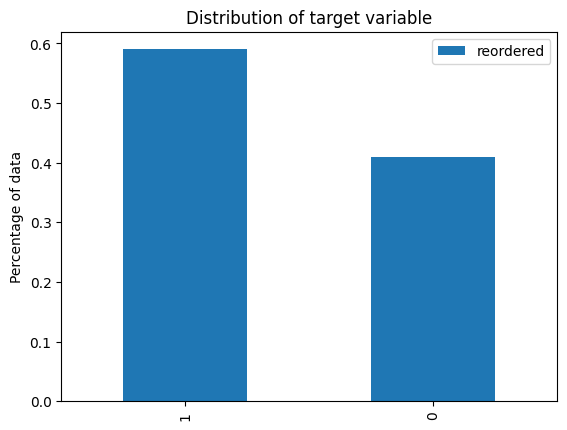

In [15]:
data=df.copy()
(data['reordered'].value_counts()/data.shape[0]).plot(kind='bar')
plt.ylabel("Percentage of data")
plt.title("Distribution of target variable")
plt.legend()
plt.show()

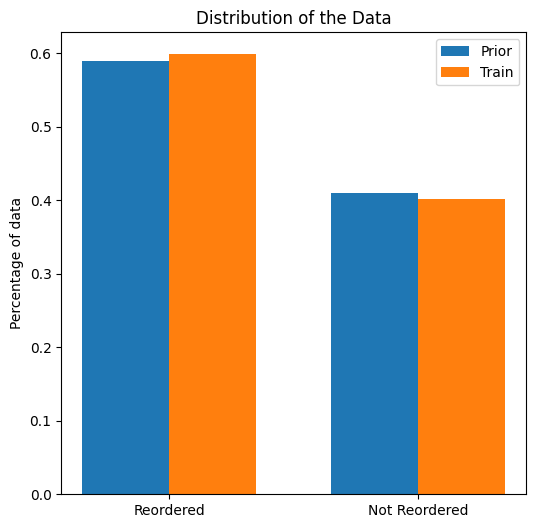

In [21]:
prior_set=df[df['eval_set']=='prior']
train_set=df[df['eval_set']=='train']

prior_set = prior_set['reordered'].value_counts()/prior_set.shape[0]
train_set = train_set['reordered'].value_counts()/train_set.shape[0]

width = 0.35  
x = np.array([0,1])
fig, ax = plt.subplots(figsize=(6,6))
rects1 = ax.bar(x - width/2, prior_set, width, label='Prior')
rects2 = ax.bar(x + width/2, train_set, width, label='Train')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of data')
ax.set_title('Distribution of the Data')
ax.set_xticks(x)
ax.set_xticklabels(['Reordered','Not Reordered'])
ax.legend()
plt.show()

Analysis
- Distribution is similar in both Prior and Train Set
- Around 60% of time product has been reordered

In [23]:
del prior_set, train_set

Orders - How many orders were placed by every user ?

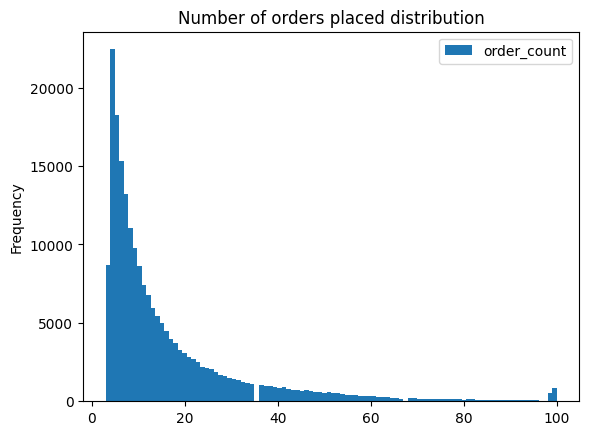

In [32]:
df.groupby('user_id')['order_id'].nunique().reset_index(name='order_count').set_index('user_id').plot.hist(bins=100)
plt.title("Number of orders placed distribution")
plt.legend()
plt.show()

Analysis
- Users have placed order between 0 to 40
- Histogram shows that very less users placed orders more than 40 and very few 100

Products frequently ordered

In [35]:
data=df.groupby(['product_name'])['product_name'].size().reset_index(name = 'order_rate').sort_values(by ='order_rate', ascending = False)
data['order_rate'] = data['order_rate']/df['order_id'].nunique()
data.set_index('product_name', inplace = True)
data.round(5)

,order_rate
product_name,
Banana,0.14683
Bag of Organic Bananas,0.11803
Organic Strawberries,0.08236
Organic Baby Spinach,0.07522
Organic Hass Avocado,0.06601
...,...
Greek Blended Cherry Fat Free Yogurt,0.00000
All Natural Stevia Liquid Extract Sweetener,0.00000
"Frittata, Farmer's Market",0.00000


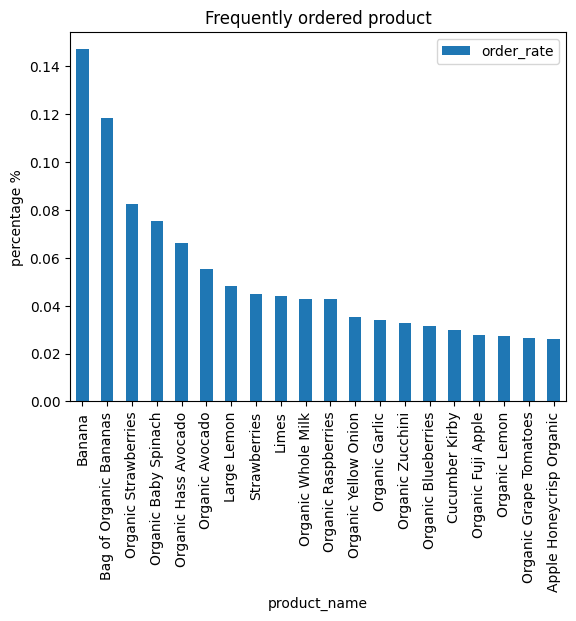

In [37]:
data[:20].plot.bar()
plt.ylabel("percentage %")
plt.title('Frequently ordered product')
plt.show()

Analysis
- The most 20 frequently brought items include banana, organic strawberries etc. 
- Mostly are fruits and it makes sense as people are more concered about their health and skin care. 

In [38]:
del data
gc.collect()

11983

Least freqeuntly brought items

In [42]:
print("Least frequently ordered product ")
print(df['product_name'].value_counts()[-10:])

Least frequently ordered product 
String Of Pearl White Sprinkles                           1
Organic Aleppo Pepper                                     1
Sloppy Joe Sandwich Makers                                1
Flax Oil, Organic, Omega-3, Original Formula              1
Max White With Polishing Star Soft Toothbrush             1
12 Inch Taper Candle White                                1
Pure Performance Restorative Shampoo Chamomile & Honey    1
Yellow Fish Breading                                      1
Orangemint Flavored Water                                 1
Flatbread Pizza All Natural                               1
Name: product_name, dtype: int64


Products that are frequently reordered

In [46]:
data = df[df['reordered'] ==1].groupby(['product_name'])['product_name'].size().reset_index(name = 'reorder_rate').sort_values(by ='reorder_rate', ascending = False)
data['reorder_rate'] = data['reorder_rate']/df[df['reordered'] ==1]['order_id'].nunique()
data.set_index('product_name', inplace = True)
data.round(5)

,reorder_rate
product_name,
Banana,0.14078
Bag of Organic Bananas,0.11166
Organic Strawberries,0.07272
Organic Baby Spinach,0.06610
Organic Hass Avocado,0.05974
...,...
Raspberry Cheesecake,0.00000
Liquid Vitamin B-Complex Natural Tangerine Flavor,0.00000
Oktoberfest Malt Liquor,0.00000


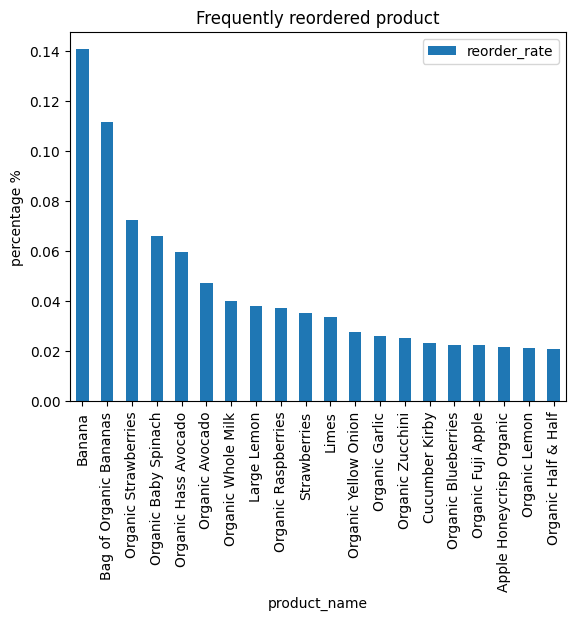

In [48]:
data[:20].plot.bar()
plt.ylabel("percentage %")
plt.title('Frequently reordered product')
plt.show()

In [49]:
del data

Frequently ordered & Reordered from aisles

In [26]:
print("Total number of aisles present:",df['aisle'].nunique())

Total number of aisles present: 134


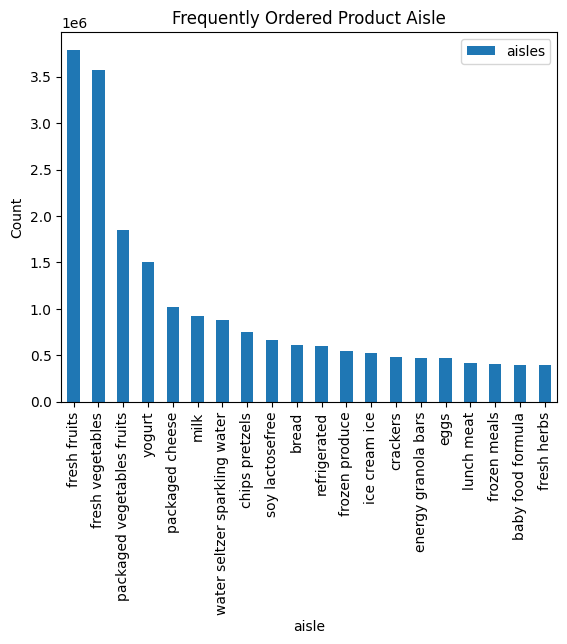

In [19]:
df.groupby('aisle').size().sort_values(ascending=False)[:20].plot.bar()
plt.ylabel("Count")
plt.title('Frequently Ordered Product Aisle')
plt.legend(['aisles'])
plt.show()

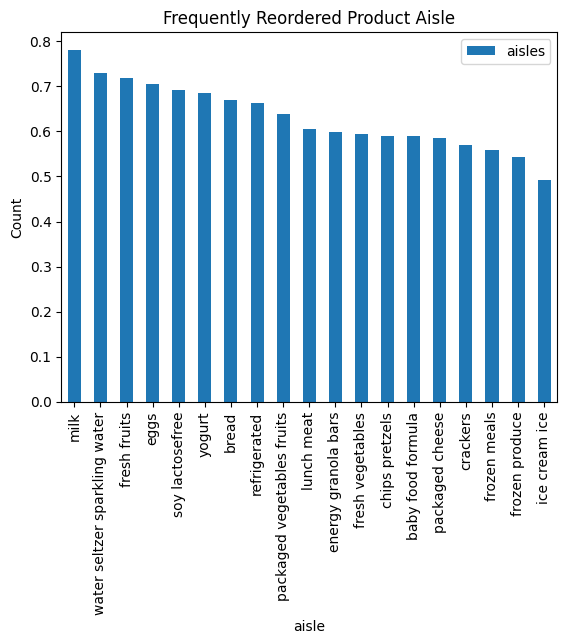

In [32]:
(df[df['reordered']==1].groupby('aisle').size().sort_values(ascending=False)[:20]/df.groupby('aisle').size().sort_values(ascending=False)[:20]).dropna().sort_values(ascending=False).plot.bar()
plt.ylabel("Count")
plt.title('Frequently Reordered Product Aisle')
plt.legend(['aisles'])
plt.show()

Analysis
- There are total 134 different aisles
- As we can see, most products are ordered from Fresh Fruits and Fresh Vegetables aisles.
- Other frequently ordered items are from Yogurt , Packaged Vegetables and packaged cheese aisles.
- Least frequently ordered items are from Air fresheners, Baby accessories, Baby bath body care etc. aisles
- Milk, sparkling water, fruits, eggs, yogurt are most common aisles the product is reordered from, as they are items which are daily consumed, and one rarely switches from their usual meal plan. Also these are the products that lasts only few days , thus high reorder rate.
- On the other hand hair care, skin care, kitchen supplies are the one which lasts longer than other, hence low reorder rate.

Frequently ordered & Reordered from aisles

In [28]:
print("Total number of aisles present:",df['department'].nunique())

Total number of aisles present: 21


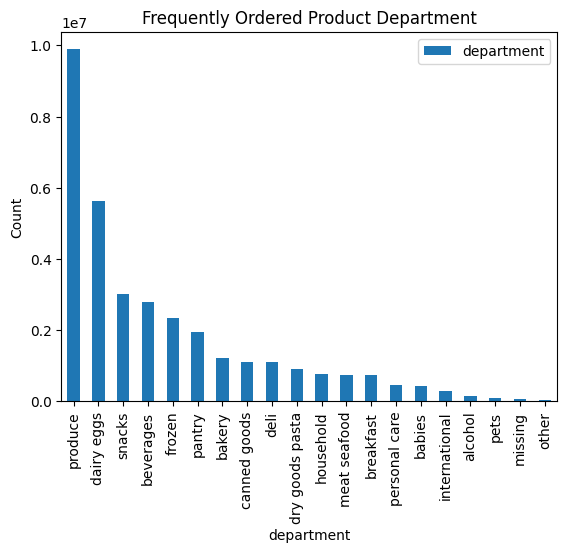

In [29]:
df.groupby('department').size().sort_values(ascending=False)[:20].plot.bar()
plt.ylabel("Count")
plt.title('Frequently Ordered Product Department')
plt.legend(['department'])
plt.show()

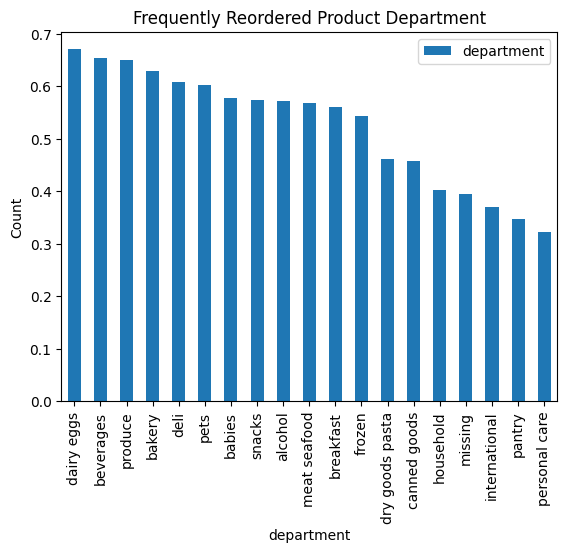

In [31]:
(df[df['reordered']==1].groupby('department').size().sort_values(ascending=False)[:20]/df.groupby('department').size().sort_values(ascending=False)[:20]).dropna().sort_values(ascending=False).plot.bar()
plt.ylabel("Count")
plt.title('Frequently Reordered Product Department')
plt.legend(['department'])
plt.show()

Analysis
- There are total 21 departments
- As seen from departments analysis , most ordered products are from produce department which have fresh vegetables, fruits, herbs etc. But most reordered product department is dairy eggs having yogurt, milk, eggs, cheese etc.
- We see high reorder rate in organic foods and daily consumed items.
- Low reorder rate in personal care departments

 Cart size on different orders

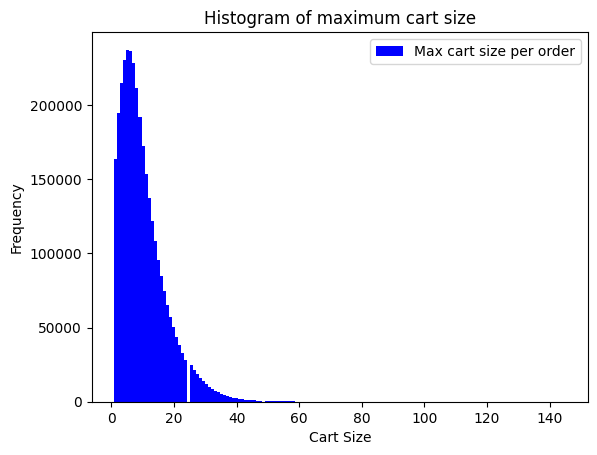

In [33]:
df.groupby('order_id')['add_to_cart_order'].max().plot.hist(bins=150, color = 'b')
plt.xlabel("Cart Size")
plt.title('Histogram of maximum cart size')
plt.legend(['Max cart size per order'])
plt.show()

Analysis:

- We have a right skewed distribution of maximum cart size for every order, with mode = 5. There are very few order with cart size > 40 and all the way up to 145.
Before treating values here as an outlier, we need to account below facts.
- add_to_cart_order represents the order the product in the cart.
- we can get many minute relationships between product and user based on their purchases.
- as we need to get reorder probabilities for every product that user ordered, discarding data shouldn't be an option

Orders and Reorders on a particular day of week

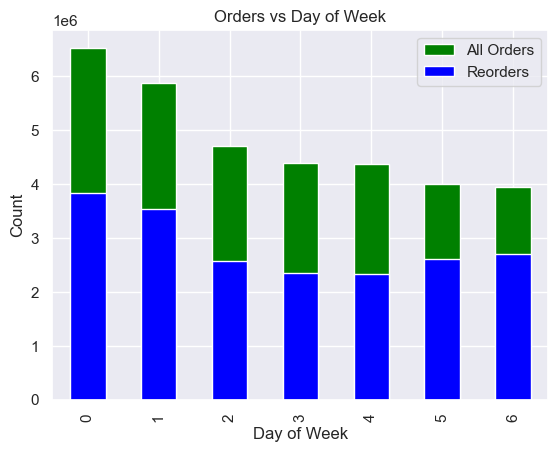

In [54]:
ax = df['order_dow'].value_counts().plot.bar(color='g')
ax = df[df['reordered']==1].groupby(['order_dow']).size().sort_index().plot.bar(color = 'b')
ax.set_xlabel("Day of Week")
ax.set_ylabel("Count")
ax.set_title('Orders vs Day of Week')
ax.legend(["All Orders", "Reorders"])
plt.show()

Analysis

- Assuming that the week starts from Sunday, most shopping is done on Sundays and Mondays. Also least orders were placed on thursday. People tend to restock there supplies on sundays.
- Reorders w.r.t to days of week is proportionally same as all orders.

Orders and Reorders on a particular hour

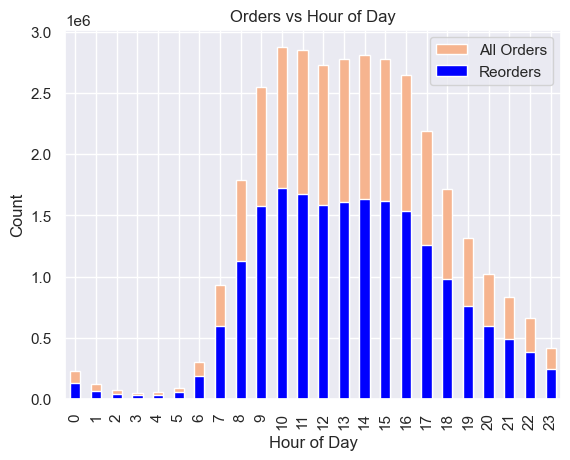

In [56]:
ax = df['order_hour_of_day'].value_counts().sort_index().plot.bar()
ax = df[df['reordered']==1].groupby(['order_hour_of_day']).size().sort_index().plot.bar(color = 'b')
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Count")
ax.set_title('Orders vs Hour of Day')
ax.legend(["All Orders", "Reorders"])

Analysis

- Most orders are placed from Early morning to midnight, and very few orders placed from midnight to early morning.

Days after user ordered / reordered a product

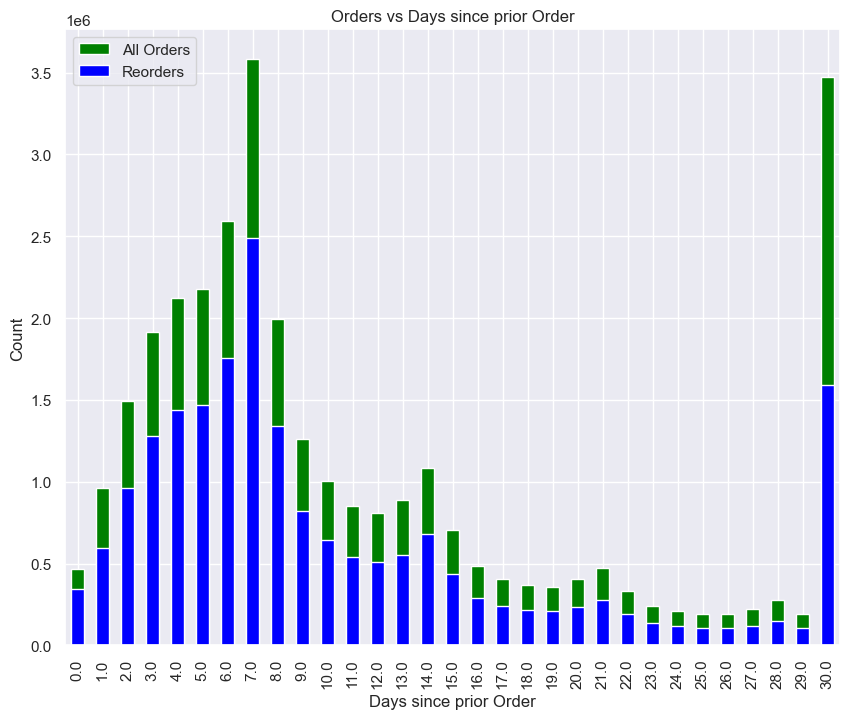

In [57]:
plt.figure(figsize=(10,8))
ax = df['days_since_prior_order'].value_counts().sort_index().plot.bar(color='g')
ax = df[df['reordered']==1].groupby(['days_since_prior_order']).size().sort_index().plot.bar(color = 'b')
ax.set_xlabel("Days since prior Order")
ax.set_ylabel("Count")
ax.set_title('Orders vs Days since prior Order')
ax.legend(["All Orders", "Reorders"])
plt.show()

Analysis:

- Most people restock after a week or a month. It seems, some people prefer buy a week / month supplies at once.
- People who are buying at Day 0, are probably new customers, but we can see a small rate of reorder implying that users tend to place multiple orders on Day 0 too.
- Probably here 30 days represents the upper limit, and not necessarily any particular month.
- There is a continous spike in orders from day 1 to day 6, shows that some people are frequent buyers wit short window of restocking

Analysis of weekly buyers and monthly buyers


Frequently brought product by weekly buyers

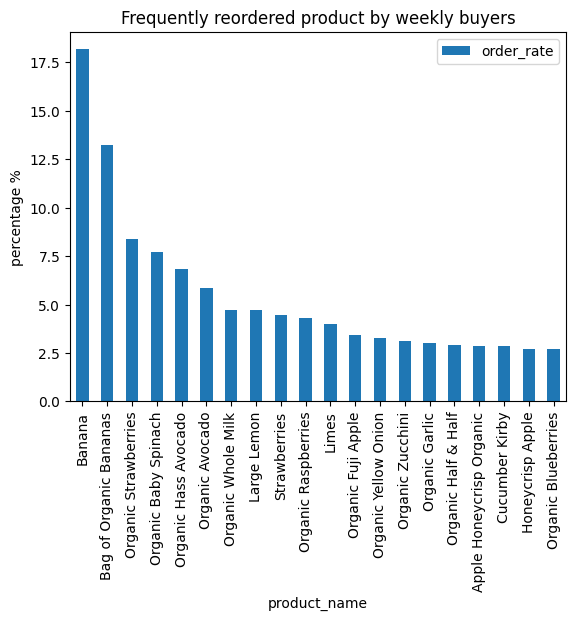

In [43]:
data = df[(df['days_since_prior_order']==7.0) & (df['reordered']==1.0)].groupby('product_name')['product_name'].size().reset_index(name = 'order_rate').sort_values(by = 'order_rate', ascending = False)
data['order_rate'] = data['order_rate']*100/ df[(df['days_since_prior_order']==7.0) & (df['reordered']==1.0)]['order_id'].nunique()
data.set_index('product_name', inplace = True)

#top 20 frequently reordered product
ax = data[:20].plot.bar()
ax.set_ylabel("percentage %")
ax.set_title('Frequently reordered product by weekly buyers')
plt.show()

Frequently brought product by monthly buyers

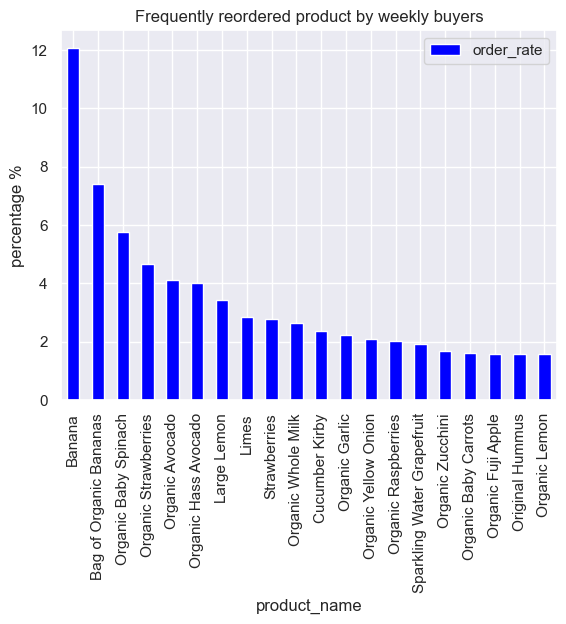

In [60]:
data = df[(df['days_since_prior_order']==30.0) & (df['reordered']==1.0)].groupby('product_name')['product_name'].size().reset_index(name = 'order_rate').sort_values(by = 'order_rate', ascending = False)
data['order_rate'] = data['order_rate']*100/ df[(df['days_since_prior_order']==30.0) & (df['reordered']==1.0)]['order_id'].nunique()
data.set_index('product_name', inplace = True)

#top 20 frequently reordered product
ax = data[:20].plot.bar(color='b')
ax.set_ylabel("percentage %")
ax.set_title('Frequently reordered product by weekly buyers')
plt.show()

In [62]:
del data

Analysis:
- Weekly/monthly buyers tend to buy similar products
- These products, in general, have highest reorder rate irrespective of day of purchase

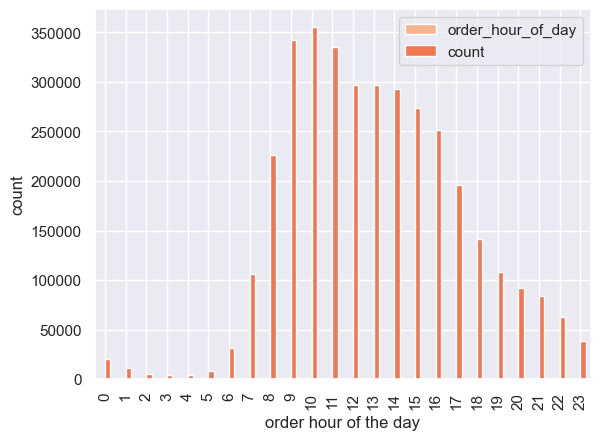

In [65]:
df[(df['days_since_prior_order']==7.0)].groupby('order_hour_of_day')['order_hour_of_day'].count().reset_index(name='count').plot.bar()
plt.ylabel('count')
plt.xlabel('order hour of the day')
plt.show()

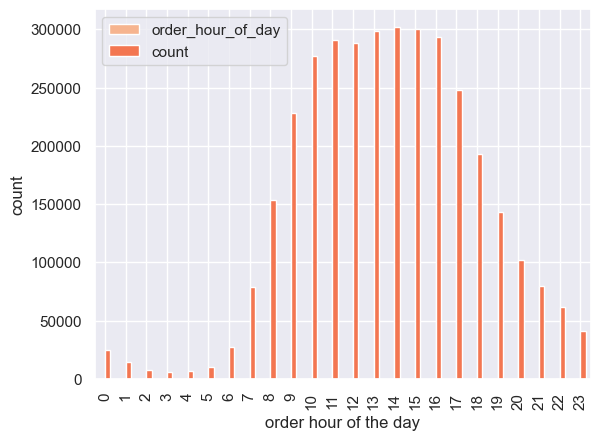

In [66]:
df[(df['days_since_prior_order']==30.0)].groupby('order_hour_of_day')['order_hour_of_day'].count().reset_index(name='count').plot.bar()
plt.ylabel('count')
plt.xlabel('order hour of the day')
plt.show()

Analysis:

- Weekly/monthly buyer's time of purchase ,is similar to the normal purchase time pattern, which can be seen from above 2 Hour of Day plots

Bivariate Analysis

Impact of day of the week and hour of the day on product order/reorder

In [91]:
orders_by_day_hour = df.pivot_table(index='order_dow', columns='order_hour_of_day', values='order_id', aggfunc='count')
reordered_by_day_hour = df[df['reordered'] == 1].pivot_table(index='order_dow', columns='order_hour_of_day', values='product_id', aggfunc='count')
reorder_rate_by_day_hour = reordered_by_day_hour / orders_by_day_hour


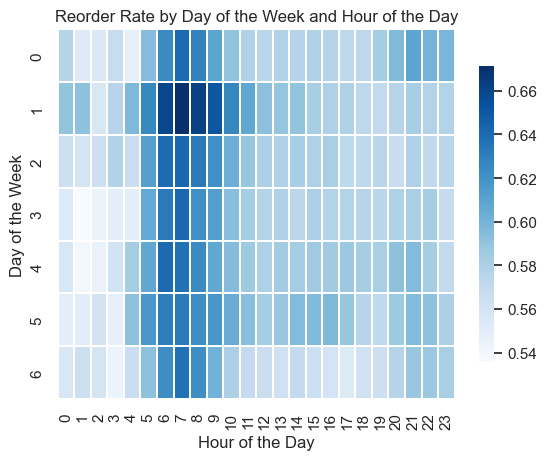

In [92]:
sns.heatmap(reorder_rate_by_day_hour, cmap='Blues', linewidth=0.3, cbar_kws={"shrink": .8})
plt.title('Reorder Rate by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

In [108]:
order_day = df.groupby(['order_dow'])['order_id'].count().reset_index(name='count')
reorder_day_hour = df[df['reordered'] == 1].groupby(['order_dow', 'order_hour_of_day'])['order_id'].count().reset_index(name='reorder_rate')
reorder_day_hour = pd.merge(reorder_day_hour, order_day, on='order_dow', how='left')
reorder_day_hour['reorder_rate'] = reorder_day_hour['reorder_rate'] / reorder_day_hour['count']
reorder_rate_by_day_hour = pd.pivot_table(reorder_day_hour, values='reorder_rate', index=['order_dow'], columns=['order_hour_of_day'], fill_value=0)
reorder_rate_by_hour = pd.pivot_table(reorder_day_hour, values='reorder_rate', index=['order_hour_of_day'], fill_value=0)

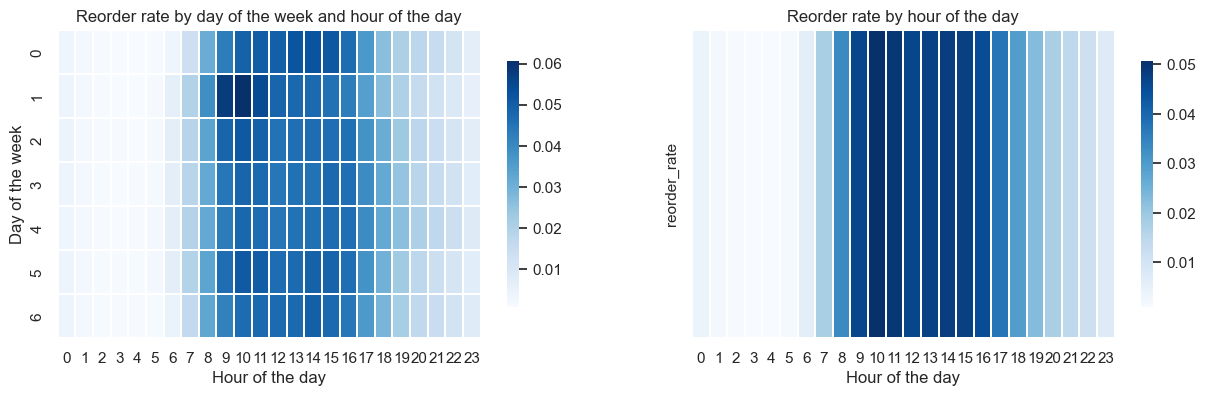

In [112]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.heatmap(reorder_rate_by_day_hour, cmap='Blues', linewidths=0.3, cbar_kws={'shrink': 0.8}, ax=axs[0])
axs[0].set_title('Reorder rate by day of the week and hour of the day')
axs[0].set_xlabel('Hour of the day')
axs[0].set_ylabel('Day of the week')
sns.heatmap(reorder_rate_by_hour.T, cmap='Blues', linewidths=0.3, cbar_kws={'shrink': 0.8}, ax=axs[1])
axs[1].set_title('Reorder rate by hour of the day')
axs[1].set_xlabel('Hour of the day')
plt.show()

Analysis:

- From the first plot all orders that were placed on any hour, most reorders were placed on day 1 ( probably Monday) from 5 AM - 10 AM.
- From second plot we can see that of all orders that were placed on any day, most reorders were placed from 8 AM - 4 PM, on any given day .

Maximum cart size after N days since prior order

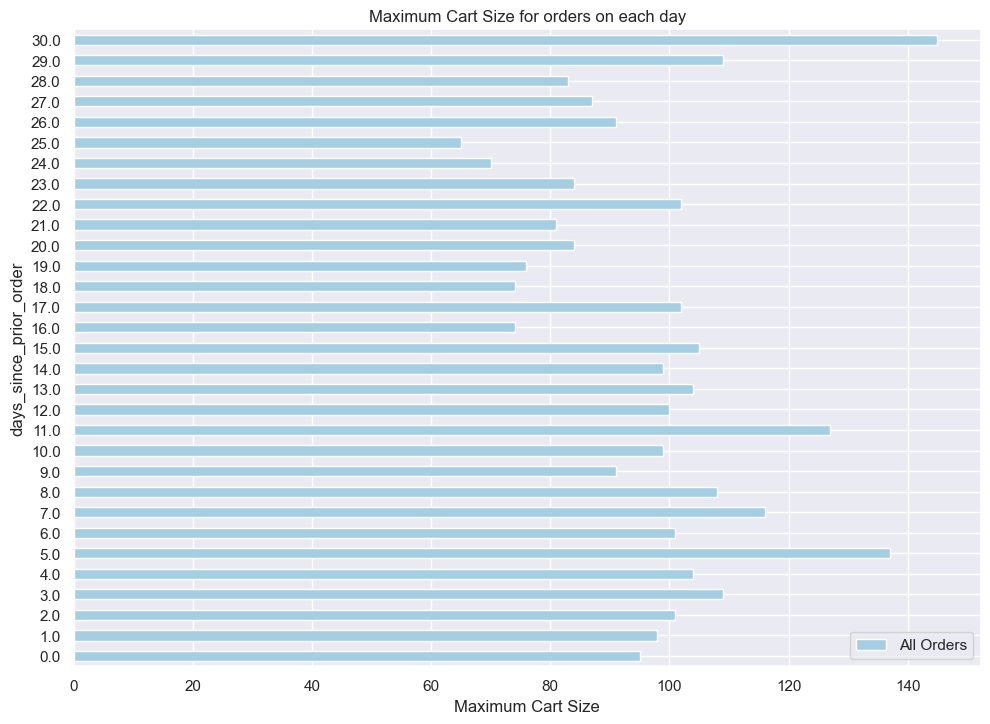

In [115]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = df.groupby(['days_since_prior_order'])['add_to_cart_order'].aggregate(np.max).plot(kind='barh',colormap='Paired')
ax.set_xlabel("Maximum Cart Size")
ax.set_title('Maximum Cart Size for orders on each day')
ax.legend(["All Orders"])

Analysis:
- As it was expected, users with 30 days gap between consecutive orders have Largest cart size. i.e. tends to order more products
- Same observation can be seen with 29 days, 11 days, 5 days gap also.
- Users placing order on Day 0, have maximum cart size of around 100, these include both first time orders and multiple orders
- Also, average cart size for orders on any day is around 8.

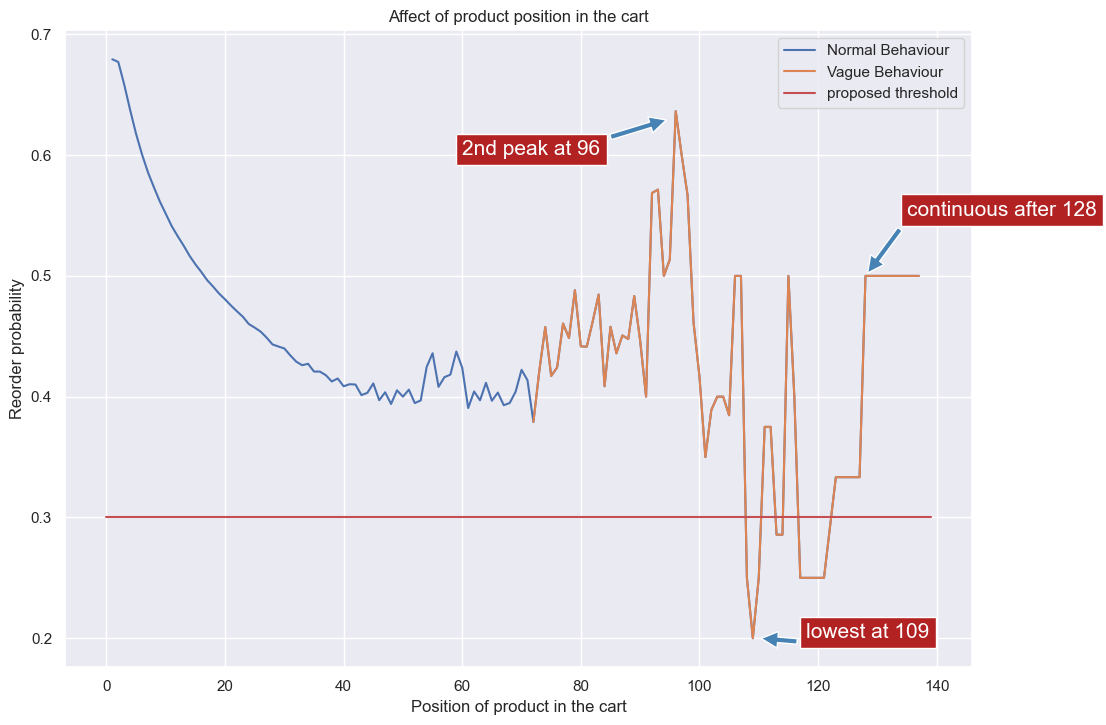

In [120]:
data = pd.DataFrame({'reorder_rate': df.groupby(['add_to_cart_order','reordered'])['reordered'].count().groupby(level=0,  group_keys=False).apply(lambda x: x / float(x.sum()))}).reset_index()
ax = data[data['reordered']==1].set_index('add_to_cart_order')['reorder_rate'].plot()
ax = data[data['reordered']==1].set_index('add_to_cart_order')['reorder_rate'][71:].plot()
x = [*range(0,140)]
y = [0.3 for _ in range(140)]
ax.plot(x, y, '-r')
ax.set_xlabel('Position of product in the cart')
ax.set_ylabel('Reorder probability')
ax.set_title('Affect of product position in the cart')
ax.annotate('lowest at 109', xy=(110, 0.2), xytext=(118, 0.2),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')
ax.annotate('continuous after 128', xy=(128, 0.5), xytext=(135, 0.55),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')
ax.annotate('2nd peak at 96', xy=(95, 0.63), xytext=(60, 0.6),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')
ax.legend(["Normal Behaviour", "Vague Behaviour", "proposed threshold"])

Analysis:

- We see a normal decrease in reorder probability when the position of product is increased till 71.
- But there is huge probability changes after position is increased from 71.
- The lowest reorder probability is somewhere around 0.2 when position is 109
- Position from 128 to 137 shows continous 50 % reorder probability.
- We can assume that for a product with position greater than 100 have very low probability of being reordered (below 0.3)
- Since the reorder probability of a product will depend on product position in the cart and product itself, the vague behaviour can be assumed to be the result of reshuffled position of a product with high reorder probability

Users whose order contains only reordered products

In [124]:
data = df.groupby(['user_id','order_id','reordered'])['reordered'].count()
data = (data / data.groupby(level=1).sum()).reset_index(name = 'reorder_prob')
data = pd.DataFrame(data[(data['reordered']==1) & (data['reorder_prob']==1.0)]['user_id'].value_counts().reset_index(name = 'count'))
data.columns = ['user_id', 'count']
usr_ids = data['user_id'][:20].tolist()
counts = data['count'][:20].tolist()

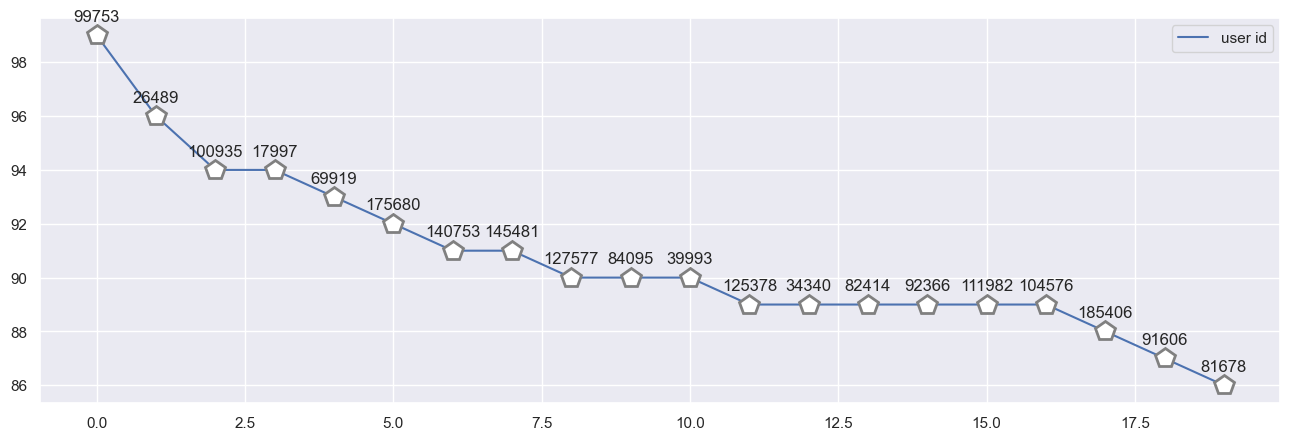

In [127]:
plt.figure(figsize=(16,5))
plt.plot(counts)
for i,c in enumerate(counts):
    plt.plot(i, c, '-p', color='gray', markersize=15, linewidth=4,
         markerfacecolor='white',markeredgecolor='gray',markeredgewidth=2)
    plt.annotate(str(usr_ids[i]), # this is the text
                 (i,c), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') 
plt.legend(['user id'])

Analysis:

- User_id 99753 have 99 orders which contains only reordered items
- Followed by User 26489 and 100935

In [128]:
gc.collect()

22514